In [16]:
import math
import os
import random

import git
import imageio
import magnum as mn
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

# function to display the topdown map
from PIL import Image

import habitat_sim
from habitat_sim.utils import common as utils
from habitat_sim.utils import viz_utils as vut

repo = git.Repo(".", search_parent_directories=True)
dir_path = repo.working_tree_dir
data_path = os.path.join(dir_path, "data")
print(f"data_path = {data_path}")
# @markdown Optionally configure the save path for video output:
output_directory = os.path.join(
    dir_path, "testing_multi_agent/Output"
)  # @param {type:"string"}
output_path = os.path.join(dir_path, output_directory)
if not os.path.exists(output_path):
    os.mkdir(output_path)

data_path = /home/sohithvishnu/Documents/AI_Project/habitat-sim/data


In [17]:
# @title Define Observation Display Utility Function { display-mode: "form" }

# @markdown A convenient function that displays sensor observations with matplotlib.

# @markdown (double click to see the code)


# Change to do something like this maybe: https://stackoverflow.com/a/41432704
def display_sample(rgb_obs, semantic_obs=np.array([]), depth_obs=np.array([])):
    from habitat_sim.utils.common import d3_40_colors_rgb

    rgb_img = Image.fromarray(rgb_obs, mode="RGBA")

    arr = [rgb_img]
    titles = ["rgb"]
    if semantic_obs.size != 0:
        semantic_img = Image.new("P", (semantic_obs.shape[1], semantic_obs.shape[0]))
        semantic_img.putpalette(d3_40_colors_rgb.flatten())
        semantic_img.putdata((semantic_obs.flatten() % 40).astype(np.uint8))
        semantic_img = semantic_img.convert("RGBA")
        arr.append(semantic_img)
        titles.append("semantic")

    if depth_obs.size != 0:
        depth_img = Image.fromarray((depth_obs / 10 * 255).astype(np.uint8), mode="L")
        arr.append(depth_img)
        titles.append("depth")

    plt.figure(figsize=(12, 8))
    for i, data in enumerate(arr):
        ax = plt.subplot(1, 3, i + 1)
        ax.axis("off")
        ax.set_title(titles[i])
        plt.imshow(data)
    plt.show(block=False)


if __name__ == "__main__":
    import argparse

    parser = argparse.ArgumentParser()
    parser.add_argument("--no-display", dest="display", action="store_false")
    parser.add_argument("--no-make-video", dest="make_video", action="store_false")
    parser.set_defaults(show_video=True, make_video=True)
    args, _ = parser.parse_known_args()
    show_video = args.display
    display = args.display
    do_make_video = args.make_video
else:
    show_video = False
    do_make_video = False
    display = False

# import the maps module alone for topdown mapping
if display:
    from habitat.utils.visualizations import maps

In [25]:
# This is the scene we are going to load.
# we support a variety of mesh formats, such as .glb, .gltf, .obj, .ply
test_scene = os.path.join(
    data_path, "Custom_maps/test234.obj"
)

sim_settings = {
    "scene": test_scene,  # Scene path
    "default_agent": 0,  # Index of the default agent
    "sensor_height": 1.5,  # Height of sensors in meters, relative to the agent
    "width": 256,  # Spatial resolution of the observations
    "height": 256,
}

In [26]:
# This function generates a config for the simulator.
# It contains two parts:
# one for the simulator backend
# one for the agent, where you can attach a bunch of sensors
def make_simple_cfg(settings):
    # simulator backend
    sim_cfg = habitat_sim.SimulatorConfiguration()
    sim_cfg.scene_id = settings["scene"]

    # agent
    agent_cfg = habitat_sim.agent.AgentConfiguration()

    # In the 1st example, we attach only one sensor,
    # a RGB visual sensor, to the agent
    rgb_sensor_spec = habitat_sim.CameraSensorSpec()
    rgb_sensor_spec.uuid = "color_sensor"
    rgb_sensor_spec.sensor_type = habitat_sim.SensorType.COLOR
    rgb_sensor_spec.resolution = [settings["height"], settings["width"]]
    rgb_sensor_spec.position = [0.0, settings["sensor_height"], 0.0]

    agent_cfg.sensor_specifications = [rgb_sensor_spec]

    return habitat_sim.Configuration(sim_cfg, [agent_cfg])


cfg = make_simple_cfg(sim_settings)

In [27]:
try:  # Needed to handle out of order cell run in Jupyter
    sim.close()
except NameError:
    pass
sim = habitat_sim.Simulator(cfg)


PluginManager::Manager: duplicate static plugin StbImageImporter, ignoring
PluginManager::Manager: duplicate static plugin GltfImporter, ignoring


Renderer: NVIDIA GeForce RTX 3060 Laptop GPU/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 560.35.03
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


PluginManager::Manager: duplicate static plugin BasisImporter, ignoring
PluginManager::Manager: duplicate static plugin AssimpImporter, ignoring
PluginManager::Manager: duplicate static plugin AnySceneImporter, ignoring
PluginManager::Manager: duplicate static plugin AnyImageImporter, ignoring
[20:30:28:893731]:[Warning]:[Metadata] SceneDatasetAttributes.cpp(107)::addNewSceneInstanceToDataset : Dataset : 'default' : Lighting Layout Attributes 'no_lights' specified in Scene Attributes but does not exist in dataset, so creating default.
[20:30:28:893784]:[Warning]:[Scene] SemanticScene.h(328)::checkFileExists : ::loadSemanticSceneDescriptor: File/home/sohithvishnu/Documents/AI_Project/habitat-sim/data/Custom_maps/test234.scndoes not exist.  Aborting load.
[20:30:28:893799]:[Warning]:[Scene] SemanticScene.cpp(121)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SemanticAttributes-provided name : `/home/sohithvishnu/Documents/AI_Project/habitat-sim/data/Custom_maps/test234.sc

Discrete action space:  ['move_forward', 'turn_left', 'turn_right']
Agent 0: performed action: move_forward, new position: [ 0.    0.   -0.25]


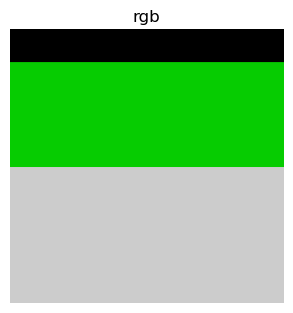

Agent 0: performed action: turn_right, new position: [ 0.    0.   -0.25]


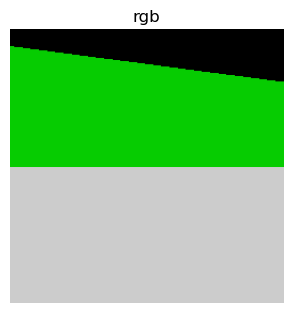

Agent 0: performed action: move_forward, new position: [ 0.04341204  0.         -0.49620193]


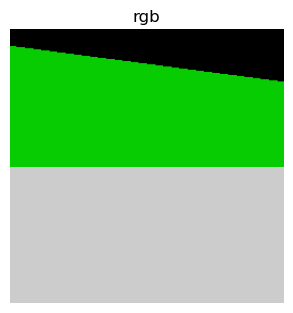

Agent 1: performed action: move_forward, new position: [ 2.    0.   -0.25]


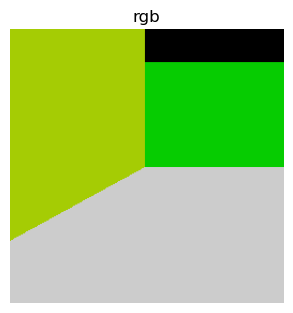

Agent 1: performed action: turn_left, new position: [ 2.    0.   -0.25]


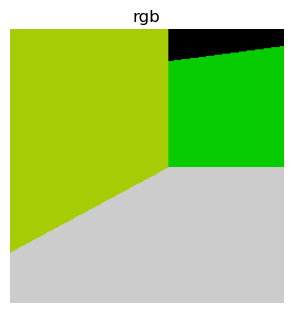

Agent 1: performed action: move_forward, new position: [ 1.9565879   0.         -0.49620193]


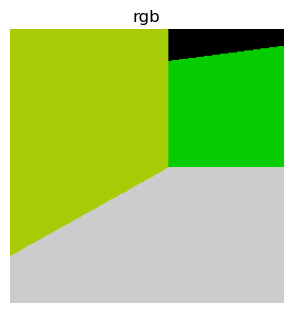

In [28]:
import habitat_sim
import numpy as np

# Assuming sim and sim_settings are already defined, with a valid config

# Get the discrete actions for the agent (move_forward, turn_left, turn_right)
action_names = list(cfg.agents[sim_settings["default_agent"]].action_space.keys())
print("Discrete action space: ", action_names)

# Number of agents
num_agents = 2

# Initialize the agents' states with different positions
starting_positions = [
    np.array([0.0, 0.0, 0.0]),  # Starting position for agent 0
    np.array([2.0, 0.0, 0.0])   # Starting position for agent 1
]

# Initialize and store states for both agents
agents_states = []
for i in range(num_agents):
    agent = sim.initialize_agent(sim_settings["default_agent"])
    agent_state = habitat_sim.AgentState()
    agent_state.position = starting_positions[i]
    agent.set_state(agent_state)  # Set the initial state of the agent
    agents_states.append(agent_state)  # Store the agent's state

# Define different actions for each agent
actions_per_agent = [
    ["move_forward", "turn_right", "move_forward"],  # Actions for agent 0
    ["move_forward", "turn_left", "move_forward"],   # Actions for agent 1
]

# Function to execute actions for each agent
def navigate_and_see(agent_index, action):
    if action in action_names:
        # Restore the agent's state before performing the action
        sim.initialize_agent(sim_settings["default_agent"])
        agent_state = agents_states[agent_index]
        agent = sim.initialize_agent(sim_settings["default_agent"])
        agent.set_state(agent_state)
        
        # Perform the action and get the observations
        observations = sim.step(action)  # This simulates the environment's response to the action
        
        # Store the updated agent state after the action
        agent_state = agent.get_state()
        agents_states[agent_index] = agent_state
        
        # Output the action and state information
        print(f"Agent {agent_index}: performed action: {action}, new position: {agent_state.position}")

        # If a display is enabled, visualize the observations
        if display:
            display_sample(observations["color_sensor"])

# Loop through each agent and perform its respective actions
for i in range(num_agents):
    for action in actions_per_agent[i]:
        navigate_and_see(i, action)


In [32]:
topdownmap_sim = maps.get_topdown_map_from_sim(
            sim, map_resolution=512, meters_per_pixel=0.5
        )
recolor_map = np.array(
            [[255, 255, 255], [128, 128, 128], [0, 0, 0]], dtype=np.uint8
        )
top_down_map = recolor_map[topdownmap_sim]
plt.imshow(top_down_map)
plt.title("top_down_map.png")
plt.show()

MemoryError: std::bad_alloc

In [30]:
topdownmap_sim

array([], shape=(0, 0), dtype=uint8)

In [31]:
print("Shape of topdownmap_sim:", topdownmap_sim.shape)
print("Content of topdownmap_sim:", topdownmap_sim)


Shape of topdownmap_sim: (0, 0)
Content of topdownmap_sim: []
